In [40]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

In [41]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

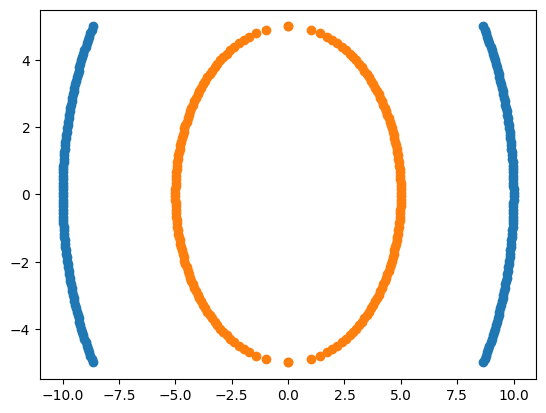

In [42]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [5]:
np.vstack([y,x]).T

array([[ 8.66025404, -5.        ],
       [ 8.71779204, -4.8989899 ],
       [ 8.77378994, -4.7979798 ],
       [ 8.82827705, -4.6969697 ],
       [ 8.88128118, -4.5959596 ],
       [ 8.93282873, -4.49494949],
       [ 8.98294476, -4.39393939],
       [ 9.03165312, -4.29292929],
       [ 9.07897646, -4.19191919],
       [ 9.12493632, -4.09090909],
       [ 9.16955321, -3.98989899],
       [ 9.21284664, -3.88888889],
       [ 9.25483518, -3.78787879],
       [ 9.29553652, -3.68686869],
       [ 9.3349675 , -3.58585859],
       [ 9.37314414, -3.48484848],
       [ 9.41008171, -3.38383838],
       [ 9.44579475, -3.28282828],
       [ 9.4802971 , -3.18181818],
       [ 9.51360192, -3.08080808],
       [ 9.54572176, -2.97979798],
       [ 9.57666854, -2.87878788],
       [ 9.60645359, -2.77777778],
       [ 9.63508769, -2.67676768],
       [ 9.66258107, -2.57575758],
       [ 9.68894344, -2.47474747],
       [ 9.714184  , -2.37373737],
       [ 9.73831149, -2.27272727],
       [ 9.76133416,

In [6]:
import pandas as pd
df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2 =pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = pd.concat([df1, df2], ignore_index=True)
df.head(5)

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [43]:
## dividing the  dependent and independent variable
x=df.iloc[:,:2]
y=df.Y

In [44]:
## now we can perform the training split test
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [9]:
x_test.shape

(100, 2)

In [10]:
## let us apply the kernel which uses the concept of ploy for features =2
df['X1-Square']=df['X1']**2
df['X2-Square']=df['X2']**2
df['X1*X2']=(df['X1']*df['X2'])

In [11]:
df.head()

,X1,X2,Y,X1-Square,X2-Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [12]:
x=df[['X1','X2','X1-Square','X2-Square','X1*X2']]
y=df['Y']


In [15]:
## Spliting of training and test- dataset
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=34)

In [16]:
X_train

,X1,X2,X1-Square,X2-Square,X1*X2
95,8.881281,4.595960,78.877155,21.122845,40.818009
181,-9.480297,-3.181818,89.876033,10.123967,30.164582
255,4.969040,0.555556,24.691358,0.308642,2.760578
387,-3.263736,-3.787879,10.651974,14.348026,12.362637
69,9.804096,1.969697,96.120294,3.879706,19.311098
...,...,...,...,...,...
324,-4.285496,2.575758,18.365473,6.634527,-11.038398
85,9.334967,3.585859,87.141618,12.858382,33.473873
246,4.987486,-0.353535,24.875013,0.124987,-1.763252
361,-4.863193,-1.161616,23.650648,1.349352,5.649164


In [21]:
!pip install plotly

In [24]:
!pip install nbformat


   ---------------------------------------- 0/7 [fastjsonschema]
   ---------------------------------------- 0/7 [fastjsonschema]
   ---------------------------------------- 0/7 [fastjsonschema]
   ----- ---------------------------------- 1/7 [rpds-py]
   ----------- ---------------------------- 2/7 [attrs]
   ----------- ---------------------------- 2/7 [attrs]
   ----------- ---------------------------- 2/7 [attrs]
   ----------- ---------------------------- 2/7 [attrs]
   ----------- ---------------------------- 2/7 [attrs]
   ----------- ---------------------------- 2/7 [attrs]
   ----------------- ---------------------- 3/7 [referencing]
   ----------------- ---------------------- 3/7 [referencing]
   ----------------- ---------------------- 3/7 [referencing]
   ----------------- ---------------------- 3/7 [referencing]
   ---------------------- ----------------- 4/7 [jsonschema-specifications]
   ---------------------------- ----------- 5/7 [jsonschema]
   ----------------------

In [29]:
df=df.rename(columns={'X1*X2':'X1_X2'})


import plotly.express as px

fig = px.scatter_3d(df, x='X1', y='X2', z='X1_X2',
              color='Y')
fig.show()

In [32]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear')
classifier.fit(X_train,Y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [33]:
from sklearn.metrics import accuracy_score
y_pred=classifier.predict(X_test)
print(accuracy_score(Y_test,y_pred))


1.0


In [ ]:
## it will be same for any of the kernel with which we are using.....